# Descriptive Statistics

```{admonition} Summary
:class: hint


```

To get an overview of the data, descriptive statistics are used. These include values such as the range, median, and mean. They will help to observe the central tendency, identify outliers, and understand the overall behavior of the data.

For this reason, the `Pandas' library added.

In [1]:
from pathlib import Path
import pandas as pd
import geopandas as gp

INPUT = Path.cwd().parents[0] / "00_data"
gdb_path = INPUT / "Biotopwerte_Dresden_2018.gdb"

The data of interest is loaded into the environment.

In [4]:
data = gp.read_file(gdb_path, layer="Biotopwerte_Dresden_2018")

Then the `describe` function of `Pandas` is used to create a summary. 

`````{admonition}  The describe function
:class: note
By default, the `describe` function creates a summary for the columns with numerical format.
`````

The statistical summary generated by `describe` function for each `Numerical` column:
- **`Count`**: Number of values
- **`Mean`**: Average of the values
- **`Std `**: spread of the data (Standard deviation)
- **`Min`**: The minimum value
- **`25%`**: lower quartile
- **`50%`**: median
- **`75%`**: upper quartile
- **`Max`**: The Maximum value

In [6]:
num_statistics = data.describe()
print(num_statistics)

        Biotpkt2018   Shape_Length    Shape_Area
count  33923.000000   33923.000000  3.392300e+04
mean       8.804984     590.458984  9.662175e+03
std        4.784322    6169.780269  4.671589e+04
min        0.000000       0.011841  5.620002e-06
25%        5.271487     136.936684  2.437363e+02
50%        7.000000     306.549587  2.016611e+03
75%       12.594189     564.009207  8.515168e+03
max       20.164493  612646.861125  3.249895e+06


`````{admonition} describe(include='all')
:class: danger
To obtain the summary statistics for all columns, including **both numerical and string** formats, the `describe` function should be called with the `include='all'` parameter.
`````

The additional statistical summary generated by `describe(include='all')` for `string` Columns:
- **`unique`**: number of distinct values
- **`top`**: most frequent value (mode)
- **`Freq`**: frequency of the top value

In [8]:
statistics = data.describe(include='all')
print(statistics)

       CLC_st1   Biotpkt2018   Shape_Length    Shape_Area  \
count    33923  33923.000000   33923.000000  3.392300e+04   
unique      26           NaN            NaN           NaN   
top        112           NaN            NaN           NaN   
freq      7187           NaN            NaN           NaN   
mean       NaN      8.804984     590.458984  9.662175e+03   
std        NaN      4.784322    6169.780269  4.671589e+04   
min        NaN      0.000000       0.011841  5.620002e-06   
25%        NaN      5.271487     136.936684  2.437363e+02   
50%        NaN      7.000000     306.549587  2.016611e+03   
75%        NaN     12.594189     564.009207  8.515168e+03   
max        NaN     20.164493  612646.861125  3.249895e+06   

                                                 geometry  
count                                               33923  
unique                                              33923  
top     MULTIPOLYGON (((415775.6353000002 5650481.4728...  
freq                       

`````{admonition} NaN values description!
:class: attention , dropdown
In some cases, there are `NaN` values in the columns. These could indicate missing values or situations where a statistical calculation is not possible for certain columns, especially for text-based data.

**ex:** metrics such as mean, min, and max do not apply to string columns!
`````

To better understand the data, using a `plot` can offer a clearer visual summary of the data in each column.

Using `matplotlib` library with various packages allows for the creation of helpful visualizations.

In [20]:
import matplotlib.pyplot as plt

For example, `box` plot is a great way to quickly review the max, min, median, and quartiles of a dataset.

It is just needed to call the `kind` of the plot which is needed, for the required column of the dataset.

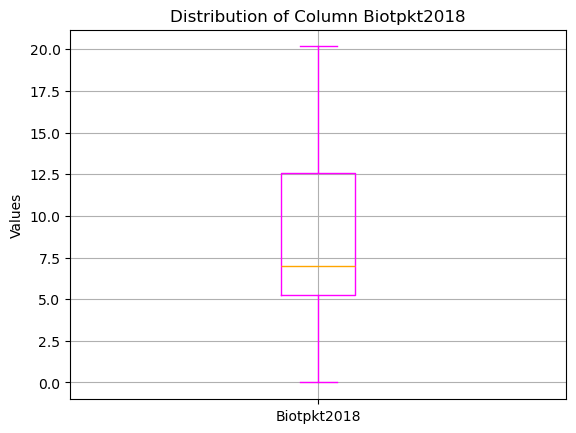

In [22]:
data['Biotpkt2018'].plot(kind='box',
                        color= 'magenta', 
                        medianprops=dict(color='orange'))

plt.title('Distribution of Column Biotpkt2018')
plt.ylabel('Values') 

plt.grid(True)
plt.show()


`````{admonition} More Plots?
:class: tip, dropdown
To find the most suitable plot based on the needs of the project, [matplotlib website](https://matplotlib.org/stable/plot_types/index.html) offers a wide range of plot types with different customization options.
`````

Based on the attributes in the dataset which mentioned in [Selecting and Filtering Data Chapter](https://stag.training.fdz.ioer.info/notebooks/303_selecting_and_filtering.html#figure-example), the `CLC_st1` includes the landcover classifications. 

To find the area allocated to  each group of landcovers, the dataset should be groped by the unique landcovers and calculate the sum of the areas.

`````{admonition} reset_index!
:class: danger
In case the output is going to be used as a DataFrame for further analysis, using `reset_index` to create a new index for calculated features is recommended.
`````

The output shows the area allocated to each landcover with specific indexes.

Based on the output for example 2.637234e+05 equal to 263723.4 square meters allocated to the landcover class of 221, which is the [Vineyard class](https://stag.training.fdz.ioer.info/notebooks/303_selecting_and_filtering.html#id1).

In [23]:
clc_areas = data.groupby("CLC_st1")["Shape_Area"]\
                .sum()\
                .reset_index()
print (clc_areas)

   CLC_st1    Shape_Area
0      111  6.029067e+06
1      112  5.542012e+07
2      121  2.814708e+07
3      122  2.939897e+07
4      123  2.688245e+05
5      124  2.189995e+06
6      131  4.539818e+05
7      132  5.479415e+05
8      133  9.029719e+03
9      141  6.653616e+06
10     142  1.338334e+07
11     211  5.584422e+07
12     221  2.637234e+05
13     222  2.088464e+06
14     231  3.915726e+07
15     311  1.685467e+07
16     312  3.483364e+07
17     313  2.354910e+07
18     321  1.535908e+05
19     322  1.147964e+06
20     324  4.669852e+06
21     332  2.305525e+04
22     333  6.014263e+04
23     411  3.089377e+04
24     511  4.750141e+06
25     512  1.841263e+06


Also to see the minimum, maximum and mean value of the covered areas by each landcover class: 

In [24]:
areas_range = data.groupby('CLC_st1')['Shape_Area']\
                  .agg(['min', 'max', 'mean'])\
                  .reset_index()
print(areas_range)

   CLC_st1           min           max          mean
0      111      0.000098  4.934056e+04   5407.234938
1      112      0.000054  1.717406e+05   7711.161342
2      121      0.000059  2.625219e+05  10302.737061
3      122      0.000017  3.249895e+06   5390.350503
4      123     86.536581  7.092068e+04  22402.040863
5      124      0.000006  5.733955e+05  16466.129727
6      131      0.762340  1.524341e+05  28373.861921
7      132      1.903708  1.303854e+05  11658.330529
8      133      0.432276  4.278339e+03   2257.429777
9      141      0.000053  7.797429e+04   4089.499603
10     142      0.000039  1.912451e+05   5546.347663
11     211      0.000270  1.313926e+06  65931.787835
12     221     64.732230  6.136028e+04  18837.386718
13     222      0.130087  1.971647e+05  37294.000428
14     231      0.000017  7.001525e+05  11891.061324
15     311      0.000047  2.220715e+05   9431.825866
16     312      0.000050  4.829764e+05  22531.462337
17     313      0.000017  2.860656e+05  14773.

It is also possible to convert the area column from square meters to hectares. In the output, it shows that more than 26 hectares belong to the code 221, [Vineyards](https://stag.training.fdz.ioer.info/notebooks/303_selecting_and_filtering.html#id1).

In [25]:
clc_areas["Shape_Area"] = clc_areas["Shape_Area"] / 10000  
print(clc_areas)

   CLC_st1   Shape_Area
0      111   602.906696
1      112  5542.011657
2      121  2814.707765
3      122  2939.897165
4      123    26.882449
5      124   218.999525
6      131    45.398179
7      132    54.794153
8      133     0.902972
9      141   665.361585
10     142  1338.333691
11     211  5584.422430
12     221    26.372341
13     222   208.846402
14     231  3915.726494
15     311  1685.467282
16     312  3483.364077
17     313  2354.910131
18     321    15.359083
19     322   114.796382
20     324   466.985162
21     332     2.305525
22     333     6.014263
23     411     3.089377
24     511   475.014072
25     512   184.126269


To find the percentage that belongs to each class:

First, the total area of the landcovers calculated, and then the percentage is calculated, and stored in a column called `share` in the same dataset. 

The following output shows that for example, 0.08% of the area covered by this dataset belongs to the code 221, [Vineyards](https://stag.training.fdz.ioer.info/notebooks/303_selecting_and_filtering.html#id1).

In [26]:
total_area = clc_areas["Shape_Area"].sum()
clc_areas["share"] = (clc_areas["Shape_Area"] / total_area) * 100

print(total_area)
print(clc_areas)

32776.99512742224
   CLC_st1   Shape_Area      share
0      111   602.906696   1.839420
1      112  5542.011657  16.908236
2      121  2814.707765   8.587449
3      122  2939.897165   8.969392
4      123    26.882449   0.082016
5      124   218.999525   0.668150
6      131    45.398179   0.138506
7      132    54.794153   0.167173
8      133     0.902972   0.002755
9      141   665.361585   2.029965
10     142  1338.333691   4.083149
11     211  5584.422430  17.037628
12     221    26.372341   0.080460
13     222   208.846402   0.637174
14     231  3915.726494  11.946569
15     311  1685.467282   5.142226
16     312  3483.364077  10.627466
17     313  2354.910131   7.184643
18     321    15.359083   0.046859
19     322   114.796382   0.350235
20     324   466.985162   1.424735
21     332     2.305525   0.007034
22     333     6.014263   0.018349
23     411     3.089377   0.009425
24     511   475.014072   1.449230
25     512   184.126269   0.561755


To find the summary of the forest areas, the area covered by these [landcovers](https://stag.training.fdz.ioer.info/notebooks/303_selecting_and_filtering.html#id1) is calculated which includes the classification codes of 311,312 and 313.

The landcover codes are selected using the `isin` method.

In [27]:
total_forest = data[data['CLC_st1']\
                    .isin(['311', '312', '313'])]['Shape_Area']\
                    .sum()
print (total_forest)

75237414.90073195


To compute the average [biodiversity value](https://stag.training.fdz.ioer.info/notebooks/303_selecting_and_filtering.html#figure-example) across all forest areas:

In [28]:
mean_biodiversity = data[data['CLC_st1']\
                        .isin(['311', '312', '313'])]['Biotpkt2018']\
                        .mean()
print(mean_biodiversity)

16.5030688377192


For effectively visualizing the distribution of continuous data and frequency of data across consecutive intervals also the `histograms` can be used.


`````{admonition} HISTOGRAM
:class: caution

Histograms are just able to represent the frequency of numeric values.

In case the type of the attribute is string like here for landcover classes, for showing frequency there are 2 methods:

1. Data should be converted to numeric values.
2. Calculate the frequency of the data as it explained in the Selecting and Filtering chapter, and then use bar chart for plot. 
`````

Converting string values to numeric values can be done using the `astype` method.

In [29]:
numeric_column= data['CLC_st1'].astype(float)

OR using the `to_numeric` method from `Pandas` package.

In [30]:
numeric_column= pd.to_numeric(data['CLC_st1'])

The output shows that for example in the column `CLC_st1` of the dataset, more than 20000 records belong to the landcover codes between 100 and 150.

This range includes the codes 111, 112, 121, 122, 123, 124, 131, 132, 133, 141, and 142 that based on the [code interpretation](https://stag.training.fdz.ioer.info/notebooks/303_selecting_and_filtering.html#id1) belong to the Artificial Surfaces like Urban fabrics, Industrial, commercial, transport units, mine, dump, construction sites and non-agricultural vegetated areas.  

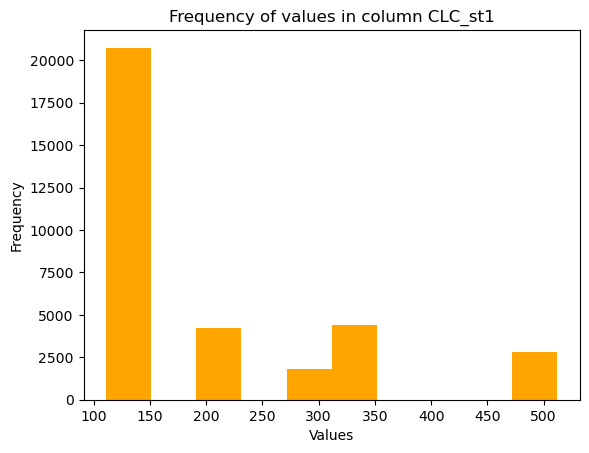

In [31]:
numeric_column.plot(kind='hist', color= 'orange')
plt.title('Frequency of values in column CLC_st1')
plt.xlabel('Values') 
plt.show()


Or the output using the bar charts with string data and calculating the frequency of the data shows the frequency for each single landcover code. 

**ex:** more than 7000 records in the dataset are related to the code 112 which represents the [Discontinuous urban fabric](https://stag.training.fdz.ioer.info/notebooks/303_selecting_and_filtering.html#id1). 

<Axes: xlabel='CLC_st1'>

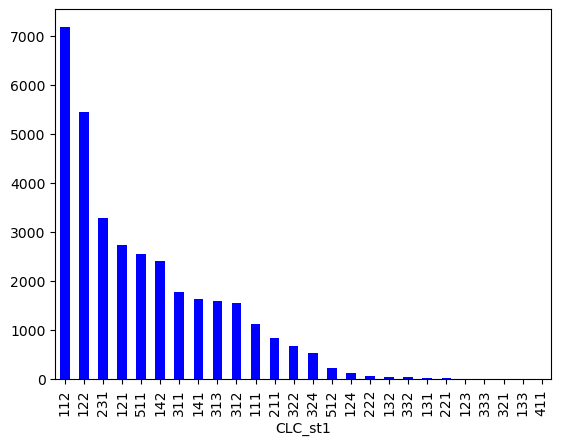

In [32]:
a = data['CLC_st1'].value_counts()
a.plot(kind='bar', color='blue')  

Also if the relationship between two variables in a dataset is important, plots such as `scatter` plot can be helpful for visualizing and understanding the relation. 

**ex:** in the following output, all the records for the landcover class with code 122, have the same biodiversity value of around 5 but for code 111, different biodiversity values are recorded.

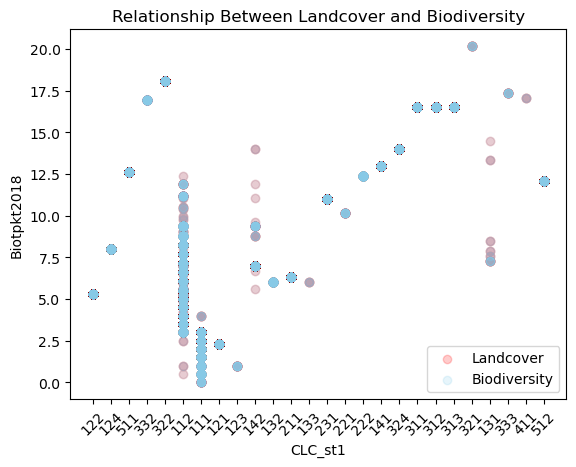

In [34]:
plt.scatter(data['CLC_st1'],
            data['Biotpkt2018'], 
            alpha=0.2, 
            color='red', 
            label='Landcover')

plt.scatter(data['CLC_st1'], 
            data['Biotpkt2018'], 
            alpha=0.2, 
            color='skyblue', 
            label='Biodiversity')


plt.title("Relationship Between Landcover and Biodiversity")
plt.xlabel('CLC_st1')
plt.ylabel('Biotpkt2018')
plt.legend()
plt.xticks(rotation=45)
plt.show()
